In [1]:
from __future__ import division

from itertools import permutations

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.exception import NetworkXNoPath
import Selection_Algorithm

In [2]:
fh=open("DataSet/USAir.txt", 'rb')
G = nx.read_weighted_edgelist(fh,nodetype=None, encoding='utf-8')
fh.close()

G = nx.convert_node_labels_to_integers(G, first_label=0, ordering="default", label_attribute = None)

In [3]:
def eff():
    i=0
    eff_list=[]
    nodes =  G.nodes
    if nodes!= 0:
        
        #H = nx.karate_club_graph()
        for i in G:  
            H = G.copy()
            ebunch =list(Selection_Algorithm.subgraph_of(i).nodes)
            H.remove_nodes_from(ebunch)
            #H.remove_node(i)
            efficiency = nx.global_efficiency(H)
            density = nx.density(H)
            EF = (i, efficiency, density)       
            eff_list.append(EF)
            
    return  eff_list

In [4]:
eff_table = pd.DataFrame(eff(), columns = ('nodes','Efficiency','Density'))
eff_table.index = eff_table.index + 1
eff_table.nodes = eff_table.nodes + 1
print(eff_table)


     nodes  Efficiency   Density
1        1    0.012459  0.007666
2        2    0.067240  0.010053
3        3    0.070319  0.010668
4        4    0.053589  0.009240
5        5    0.100506  0.011618
6        6    0.108163  0.011014
7        7    0.079052  0.012873
8        8    0.115779  0.017663
9        9    0.101160  0.014943
10      10    0.131663  0.013072
11      11    0.238423  0.020772
12      12    0.282660  0.022944
13      13    0.197590  0.022217
14      14    0.176897  0.023529
15      15    0.230499  0.017891
16      16    0.249623  0.022405
17      17    0.147543  0.021603
18      18    0.229799  0.024557
19      19    0.208149  0.016567
20      20    0.271624  0.027500
21      21    0.284081  0.026691
22      22    0.243407  0.020200
23      23    0.275022  0.026685
24      24    0.293979  0.022736
25      25    0.386514  0.035100
26      26    0.303577  0.024228
27      27    0.312995  0.025738
28      28    0.246638  0.022118
29      29    0.246688  0.019932
30      30

In [5]:
eff_table.to_csv('result/EFF_USAir.csv')

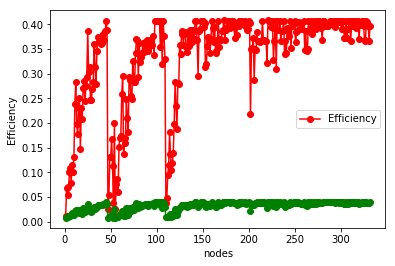

In [6]:
plt.plot(eff_table.Efficiency, 'r-o')
plt.plot(eff_table.Density, 'g-o')
plt.legend(["Efficiency"])
plt.xlabel("nodes")
plt.ylabel("Efficiency")
plt.savefig("result/USAir_eff1.png")
plt.show()

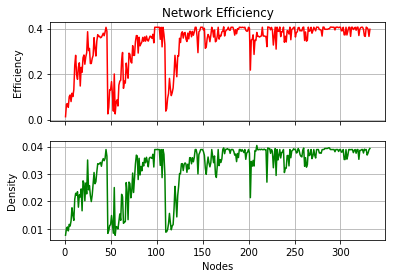

In [7]:
# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(eff_table.nodes,eff_table.Efficiency, 'r')
ax1.set(title='Network Efficiency', ylabel='Efficiency')
ax1.grid()
ax2.grid()

ax2.plot(eff_table.nodes, eff_table.Density, 'g')
ax2.set(xlabel='Nodes', ylabel='Density')
plt.savefig("result/USAir_eff2.png")
plt.show()